<a href="https://colab.research.google.com/github/LiRan2496/deeplearning/blob/liran/%E6%AC%A2%E8%BF%8E%E4%BD%BF%E7%94%A8_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img height="45px" src="https://colab.research.google.com/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

<h1>欢迎使用 Colaboratory！</h1>


Colaboratory 是一个免费的 Jupyter 笔记本环境，不需要进行任何设置就可以使用，并且完全在云端运行。

借助 Colaboratory，您可以编写和执行代码、保存和共享分析结果，以及利用强大的计算资源，所有这些都可通过浏览器免费使用。

In [0]:
#@title Colaboratory 简介
#@markdown 下面这个时长 3 分钟的视频概述了 Colaboratory 的主要功能：
from IPython.display import YouTubeVideo
YouTubeVideo('inN8seMm7UI', width=600, height=400)

In [4]:
import keras
import tensorflow as tf
print(tf.__version__)
import cv2


Using TensorFlow backend.


1.13.1


In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('loss') < 0.4:
      print('\nReached 60% accuracy so cancelling training!')
      self.model.stop_training = True
callback = myCallback()

In [6]:
 fashion_mnist = keras.datasets.mnist
 (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()



11493376/11490434 [==============================] - 1s 0us/step


In [0]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)


In [0]:

import matplotlib.pyplot as plt

print(x_train.shape)
print(x_train[0])
# plt.imshow(x_train[0])
print(x_train[0])

# print(y_train[0])



In [0]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [0]:
model = keras.Sequential([
    keras.layers.Conv2D(64, (3, 3), activation = 'relu', input_shape=( 28, 28, 1)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation = 'relu'), 
    keras.layers.MaxPooling2D(2, 2),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation= 'softmax')
])

In [0]:
model.summary()

In [12]:
model.compile(optimizer = tf.train.AdamOptimizer(), loss = 'sparse_categorical_crossentropy')
model.fit(x_train, y_train, epochs = 5, callbacks = [callback])

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 101s 2ms/step - loss: 0.1233

Reached 60% accuracy so cancelling training!


In [13]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 5s 470us/step


0.041140835841133955

(3, 4)


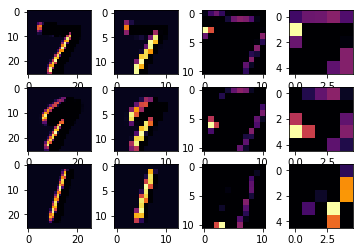

In [23]:
layer_outputs = [layer.output for layer in model.layers]
activation_model = keras.models.Model(inputs=model.input, outputs=layer_outputs)
f, axarr = plt.subplots(3,4)
print(axarr.shape)
FIRST_IMAGE = 0
SECOND_IMAGE = 20
THIRD_IMGAE = 2
CONVELUTION_NUMBER = 3
for x in range(4):
  f1 = activation_model.predict(x_test[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0][x].imshow(f1[0, :, :, CONVELUTION_NUMBER], cmap='inferno')
  axarr[0][x].grid(False)
  f2 = activation_model.predict(x_test[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1][x].imshow(f2[0, :, :, CONVELUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(x_test[THIRD_IMGAE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, :, :, CONVELUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)
 
  

## 开始使用

您正在阅读的文档是托管在 Colaboratory 中的 [Jupyter 笔记本](https://jupyter.org)。它并非静态页面，而是一个可让您以 Python 和其他语言编写和执行代码的互动环境。

例如，以下**代码单元格**包含一个简短的 Python 脚本，该脚本会计算值、将其存储在变量中并输出结果：

In [0]:
一天的秒数 = 24 * 60 * 60
一天的秒数

86400

要执行上述单元格中的代码，请点击选择它，然后按代码左侧的“播放”按钮，或使用键盘快捷键“⌘/Ctrl+Enter”。

所有单元格都会修改同一全局状态，因此您通过执行某个单元格定义的变量可用在其他单元格中：

In [0]:
一周的秒数 = 7 * 一天的秒数
一周的秒数

604800

## 更多资源

要了解如何充分利用 Python、Jupyter、Colaboratory 和相关工具，请参阅以下资源：

### 机器学习速成课程
以下是可以在 Google 的在线机器学习课程中找到的部分笔记本。请查看[完整课程网站](https://developers.google.com/machine-learning/crash-course/)了解详情。
- [Pandas 简介](/notebooks/mlcc/intro_to_pandas.ipynb)
- [TensorFlow 编程概念](/notebooks/mlcc/tensorflow_programming_concepts.ipynb)
- [使用 TensorFlow 的基本步骤](/notebooks/mlcc/first_steps_with_tensor_flow.ipynb)
- [神经网络简介](/notebooks/mlcc/intro_to_neural_nets.ipynb)
- [稀疏数据和嵌入简介](/notebooks/mlcc/intro_to_sparse_data_and_embeddings.ipynb)

### 机器学习示例：Seedbank

要查看 Colaboratory 实现的交互式机器学习分析的端到端示例，请查看[Seedbank](https://research.google.com/seedbank/)项目。

一些精选示例：

- [Neural Style Transfer](https://research.google.com/seedbank/seed/neural_style_transfer_with_tfkeras): 使用深度学习在图像之间转换风格。
- [EZ NSynth](https://research.google.com/seedbank/seed/ez_nsynth): 使用 WaveNet 自动编码器合成音频。
- [Fashion MNIST with Keras and TPUs](https://research.google.com/seedbank/seed/fashion_mnist_with_keras_and_tpus): 使用深度学习对时装图像进行分类。
- [DeepDream](https://research.google.com/seedbank/seed/deepdream): 根据您自己的照片生成 DeepDream 图像。
- [Convolutional VAE](https://research.google.com/seedbank/seed/convolutional_vae): 创建手写数字生成模型。